# Code from TMC

In [6]:
import sys
import numpy as np

class LDA:
	def fit(self, X, y, w):
		C = np.linalg.inv(np.cov(X.T, aweights=w) + 0.001*np.eye(X.shape[1])) # add diagonal matrix to deal with singular matrices
		ind0 = y == -1
		ind1 = y == 1
		m0 = np.sum(X[ind0, :] * w[ind0, np.newaxis], axis=0) / np.sum(w[ind0])
		m1 = np.sum(X[ind1, :] * w[ind1, np.newaxis], axis=0) / np.sum(w[ind1])

		self.w = C @ (m1 - m0)
		self.b = self.find_threshold(X, y, w)
		if self.b == None:
			self.w = -self.w
			self.b = self.find_threshold(X, y, w)

	
	def find_threshold(self, X, y, w):
		score = X @ self.w
		ind = np.argsort(score)

		err = np.cumsum(y[ind]*w[ind])
		i = np.argmin(err)
		if i == len(err) - 1:
			return None
		return (score[ind[i]] + score[ind[i + 1]]) / 2


	def predict(self, X):
		return np.sign(X @ self.w - self.b) 



def adaboost(X, y, itercnt):
	cnt, k = X.shape

	err_individual = np.zeros(itercnt)
	err_ensemble = np.zeros(itercnt)
	err_exponential = np.zeros(itercnt)
	output = np.zeros(cnt)

	# initialize weights
	w = np.ones(cnt) / cnt

	lda = LDA()

	for m in range(itercnt):
		lda.fit(X, y, w)
		y_pred = lda.predict(X)
		err_individual[m] = np.sum(w[y != y_pred])*(1/np.sum(w))
		beta_m = np.log((1 - err_individual[m]) / err_individual[m])*.5
		w *= np.exp(-beta_m*y*y_pred)

		if m > 0:
			err_exponential[m-1] = np.sum(w*np.exp(-beta_m*y*y_pred))
		output += beta_m*y_pred
		err_ensemble[m] = np.count_nonzero(np.sign(output) != np.sign(y))/cnt

	final_err_individual = np.sum(w[y != y_pred])*(1/np.sum(w))
	beta_m = np.log((1 - final_err_individual) / final_err_individual)*.5
	w *= np.exp(-beta_m*y*y_pred)
	err_exponential[-1] = np.sum(w*np.exp(-beta_m*y*y_pred))
	
	return output, err_individual, err_ensemble, err_exponential


# My code

Text(0, 0.5, 'Error')

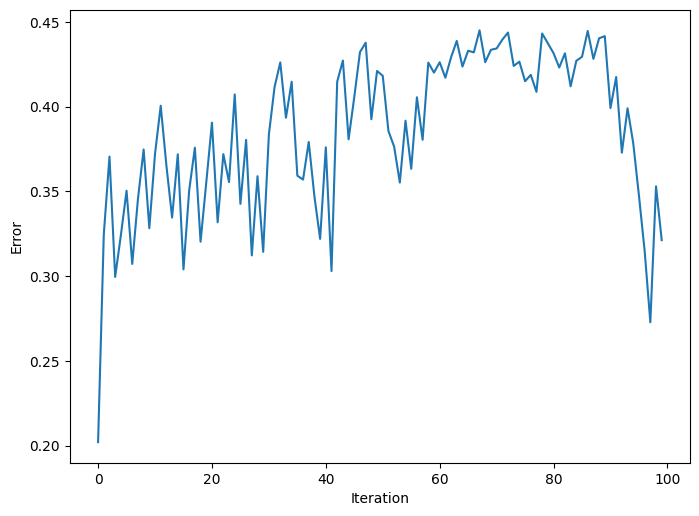

In [18]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)

D = np.loadtxt('toy.txt')
labels = D[:,0].copy()
D[:,0] = 1

itercnt = 100
output, err_individual, err_ensemble, err_exponential = adaboost(D, labels, itercnt)

X = [i for i in range(itercnt)]
plt.plot(X, err_individual, label='Individual classifiers')
plt.xlabel('Iteration')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

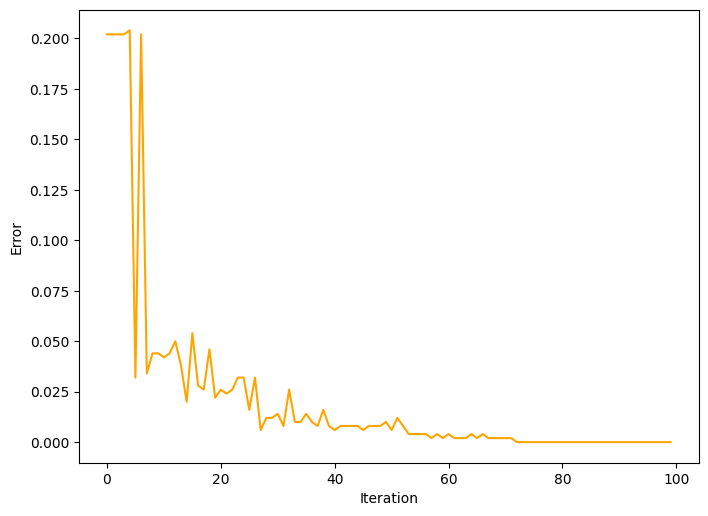

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(X, err_ensemble, label='Individual classifiers', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Error')

Text(0, 0.5, 'Loss')

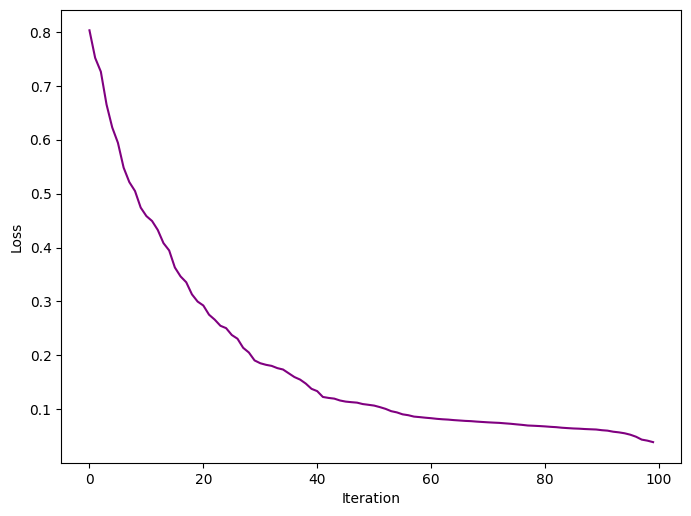

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(X, err_exponential, label='Individual classifiers', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'x2')

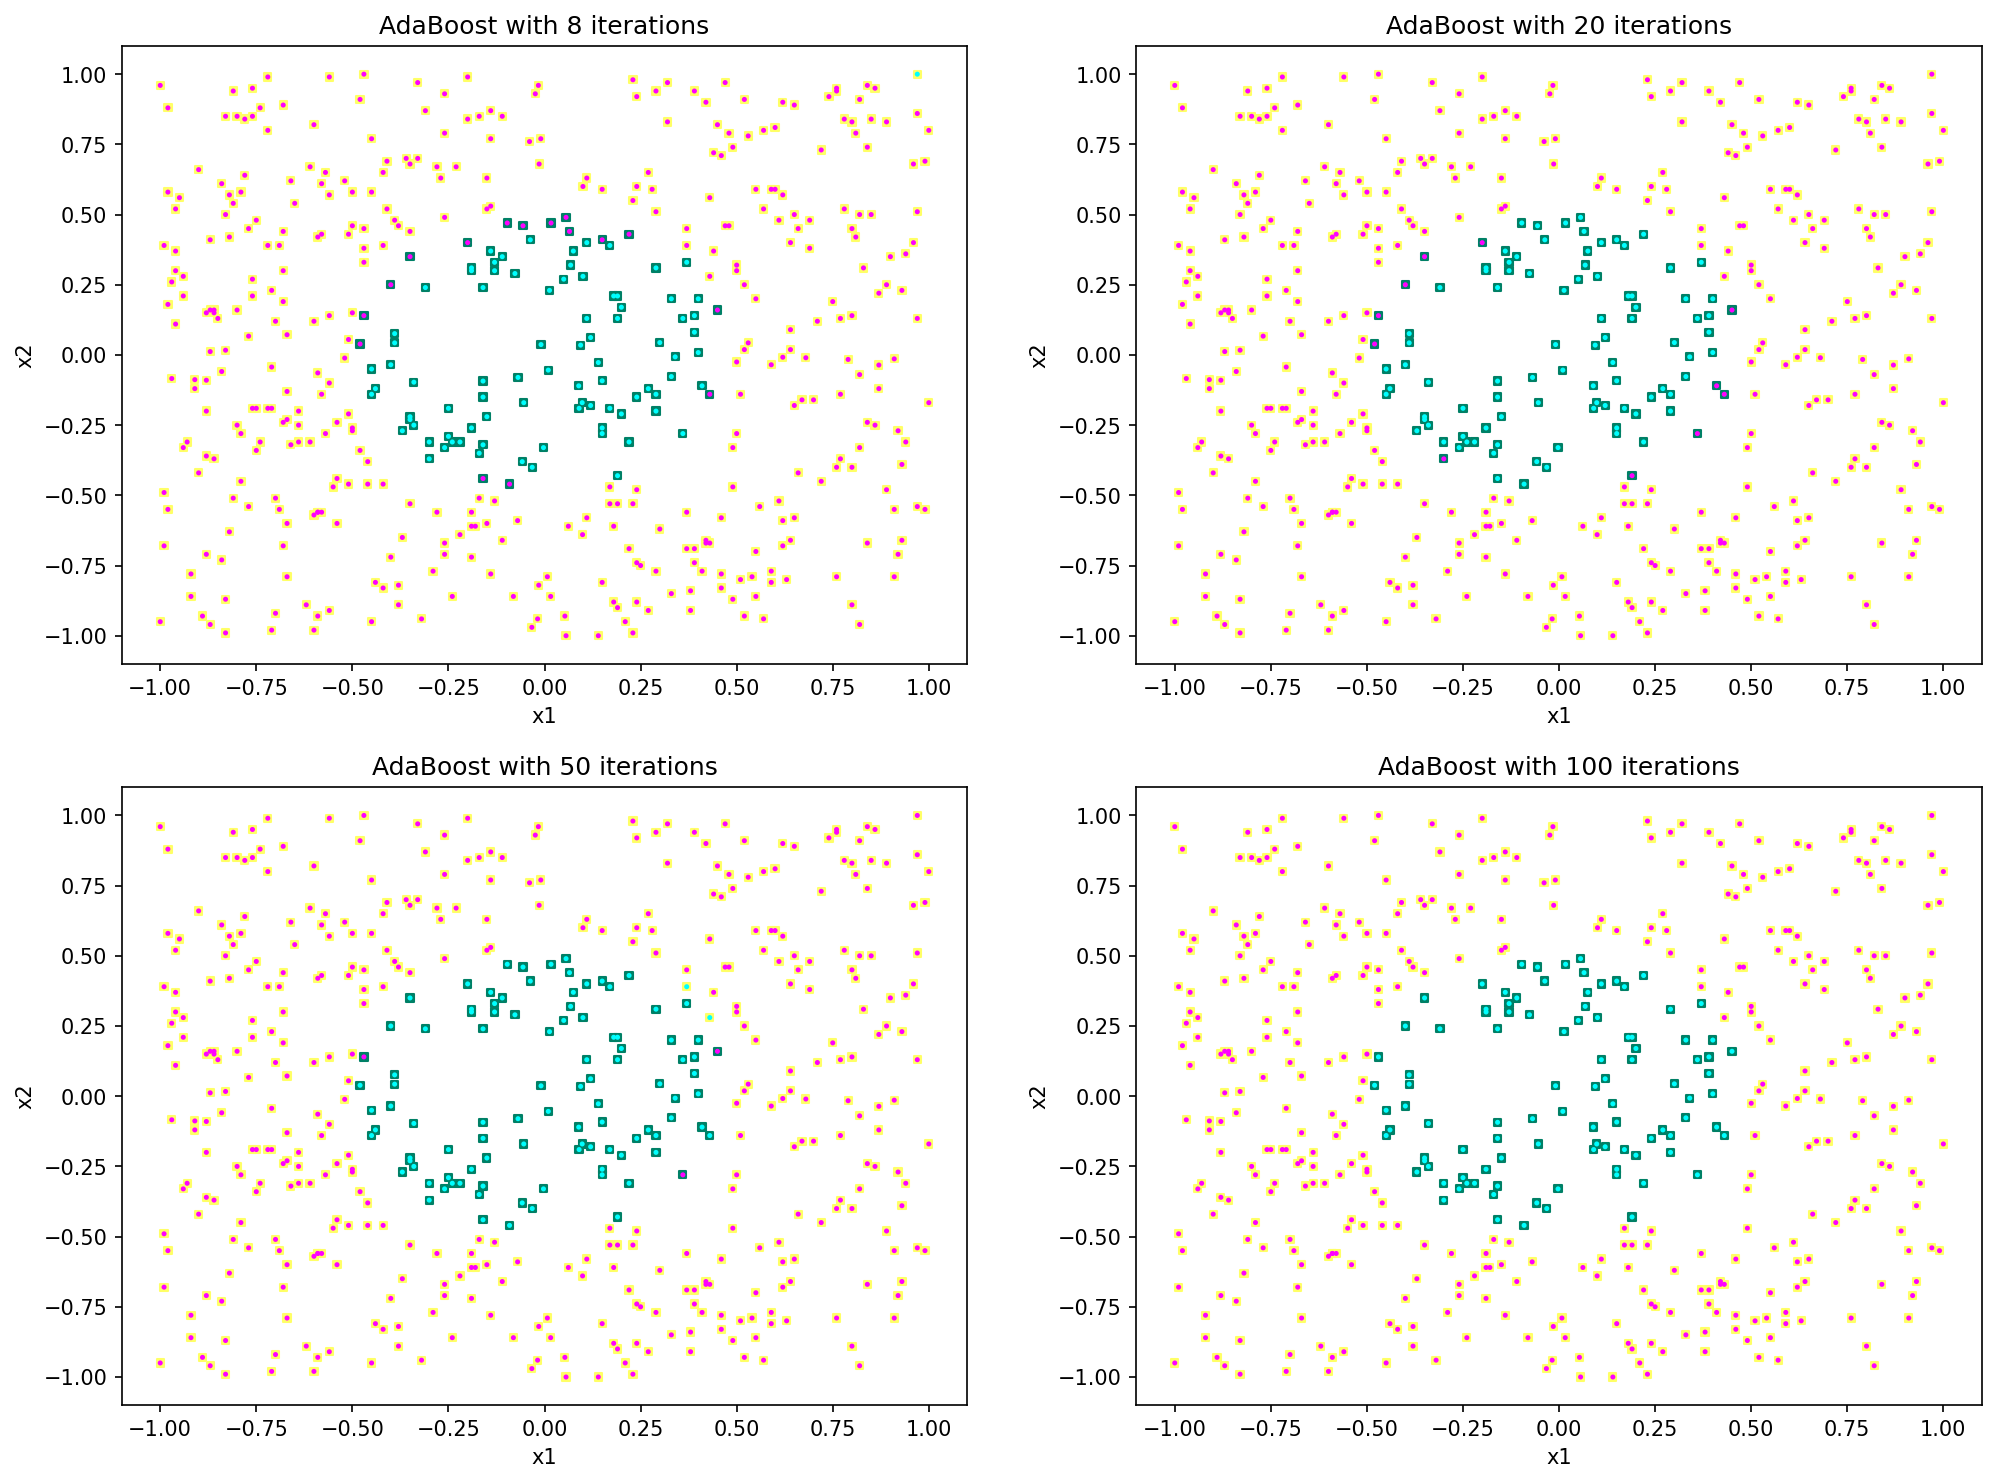

In [9]:
from matplotlib.pyplot import figure

D = np.loadtxt('toy.txt')
labels = D[:,0].copy()
D[:,0] = 1

# Second task: 4 plots
fig, ax = plt.subplots(2, 2, figsize=(16, 12), dpi=150)

itercnt = [8, 20, 50, 100]


output, err_individual, err_ensemble, err_exponential = adaboost(D, labels, 8)
ax[0,0].scatter(D[:,1], D[:,2], c=labels, s=12, marker='s', cmap='summer')
ax[0,0].scatter(D[:,1], D[:,2], c=np.sign(output), s=8, marker='.', cmap='cool')
ax[0,0].set_title('AdaBoost with {} iterations'.format(8))
ax[0,0].set_xlabel('x1')
ax[0,0].set_ylabel('x2')

output, err_individual, err_ensemble, err_exponential = adaboost(D, labels, 20)
ax[0,1].scatter(D[:,1], D[:,2], c=labels, s=12, marker='s', cmap='summer')
ax[0,1].scatter(D[:,1], D[:,2], c=np.sign(output), s=8, marker='.', cmap='cool')
ax[0,1].set_title('AdaBoost with {} iterations'.format(20))
ax[0,1].set_xlabel('x1')
ax[0,1].set_ylabel('x2')

output, err_individual, err_ensemble, err_exponential = adaboost(D, labels,50)
ax[1,0].scatter(D[:,1], D[:,2], c=labels, s=12, marker='s', cmap='summer')
ax[1,0].scatter(D[:,1], D[:,2], c=np.sign(output), s=8, marker='.', cmap='cool')
ax[1,0].set_title('AdaBoost with {} iterations'.format(50))
ax[1,0].set_xlabel('x1')
ax[1,0].set_ylabel('x2')

output, err_individual, err_ensemble, err_exponential = adaboost(D, labels, 100)
ax[1,1].scatter(D[:,1], D[:,2], c=labels, s=12, marker='s', cmap='summer')
ax[1,1].scatter(D[:,1], D[:,2], c=np.sign(output), s=8, marker='.', cmap='cool')
ax[1,1].set_title('AdaBoost with {} iterations'.format(100))
ax[1,1].set_xlabel('x1')
ax[1,1].set_ylabel('x2')

In [11]:
import matplotlib.pyplot as plt, matplotlib.figure